In [ ]:
!pip install -r requirements.txt

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Options d'affichage
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Chargement des données
file_path = "credit_default_labeled2.csv"  

df = pd.read_csv(file_path)
print("Shape du dataset :", df.shape)
df.head()

Shape du dataset : (30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,Female,University,Married,24,Delay 2 month(s),Delay 2 month(s),Paid duly,Paid duly,No consumption,No consumption,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,Female,University,Single,26,Paid duly,Delay 2 month(s),Revolving / on time,Revolving / on time,Revolving / on time,Delay 2 month(s),2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,Female,University,Single,34,Revolving / on time,Revolving / on time,Revolving / on time,Revolving / on time,Revolving / on time,Revolving / on time,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,Female,University,Married,37,Revolving / on time,Revolving / on time,Revolving / on time,Revolving / on time,Revolving / on time,Revolving / on time,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,Male,University,Married,57,Paid duly,Revolving / on time,Paid duly,Revolving / on time,Revolving / on time,Revolving / on time,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [2]:
# Aperçu global du dataset

# Informations sur les colonnes et les types
df.info()

# Statistiques descriptives des variables numériques
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  object 
 3   EDUCATION                   30000 non-null  object 
 4   MARRIAGE                    30000 non-null  object 
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  object 
 7   PAY_2                       30000 non-null  object 
 8   PAY_3                       30000 non-null  object 
 9   PAY_4                       30000 non-null  object 
 10  PAY_5                       30000 non-null  object 
 11  PAY_6                       30000 non-null  object 
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
BILL_AMT1,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0
BILL_AMT2,30000.0,49179.075167,71173.768783,-69777.0,2984.75,21200.0,64006.25,983931.0
BILL_AMT3,30000.0,47013.154800,69349.387427,-157264.0,2666.25,20088.5,60164.75,1664089.0
BILL_AMT4,30000.0,43262.948967,64332.856134,-170000.0,2326.75,19052.0,54506.00,891586.0
BILL_AMT5,30000.0,40311.400967,60797.155770,-81334.0,1763.00,18104.5,50190.50,927171.0
BILL_AMT6,30000.0,38871.760400,59554.107537,-339603.0,1256.00,17071.0,49198.25,961664.0
PAY_AMT1,30000.0,5663.580500,16563.280354,0.0,1000.00,2100.0,5006.00,873552.0


Valeurs uniques de la cible :
default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64

Proportions :
default.payment.next.month
0    0.7788
1    0.2212
Name: proportion, dtype: float64


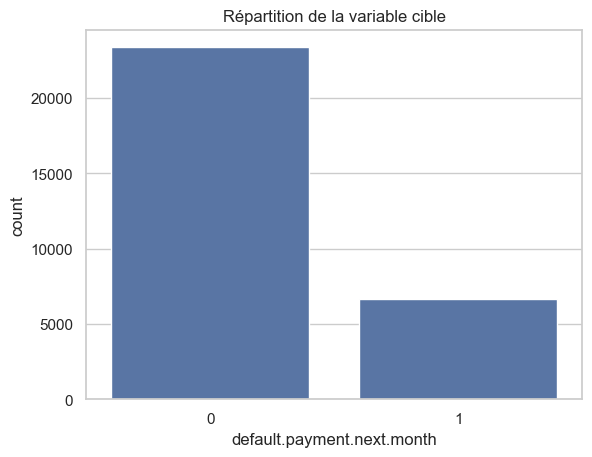

In [3]:
# Analyse de la variable cible

target_col = "default.payment.next.month"

print("Valeurs uniques de la cible :")
print(df[target_col].value_counts())
print("\nProportions :")
print(df[target_col].value_counts(normalize=True))

sns.countplot(x=target_col, data=df)
plt.title("Répartition de la variable cible")
plt.show()

In [5]:
# Vérification des valeurs manquantes

missing = df.isna().sum().sort_values(ascending=False)
missing = missing[missing > 0]

if missing.empty:
    print("Aucune valeur manquante détectée dans le dataset.")
else:
    print("Colonnes avec valeurs manquantes :")
    print(missing)

    plt.figure(figsize=(8,4))
    missing.plot(kind="bar")
    plt.title("Valeurs manquantes par variable")
    plt.show()

Aucune valeur manquante détectée dans le dataset.


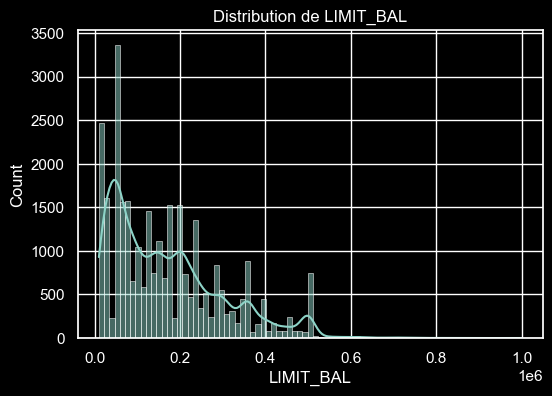

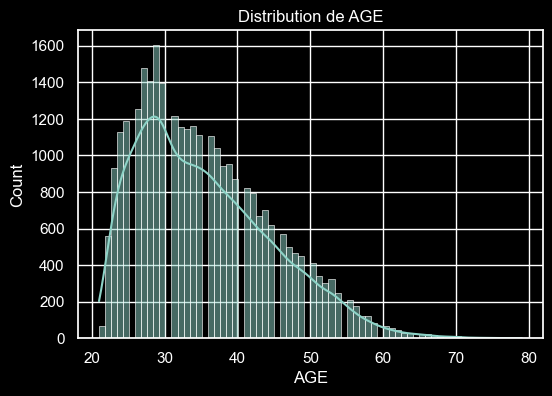

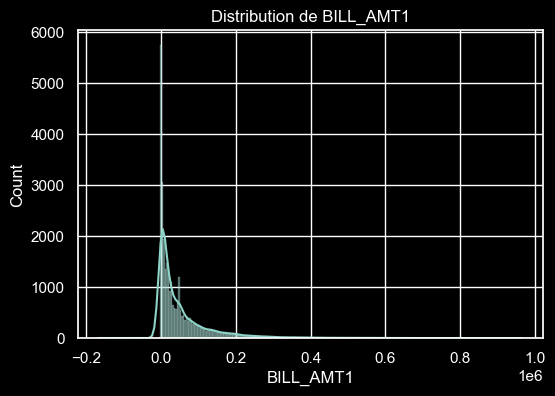

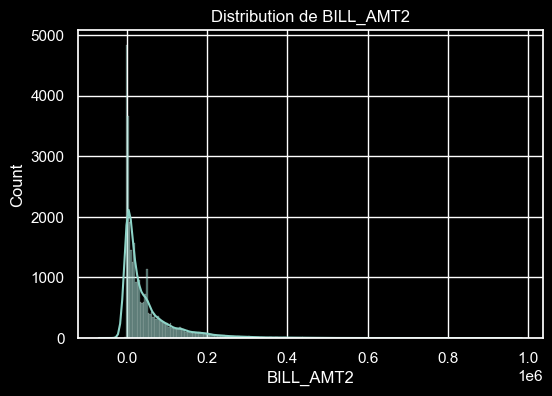

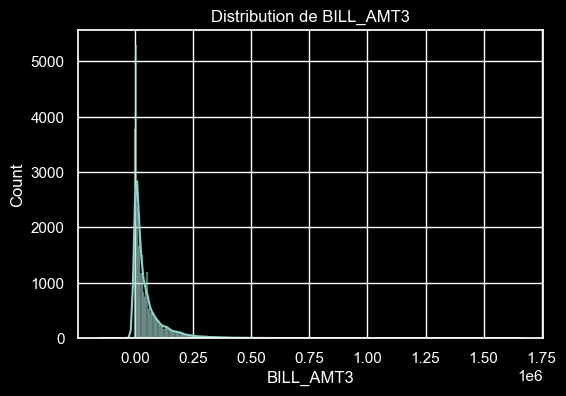

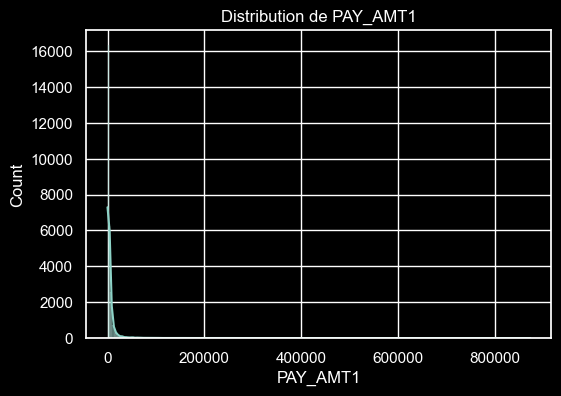

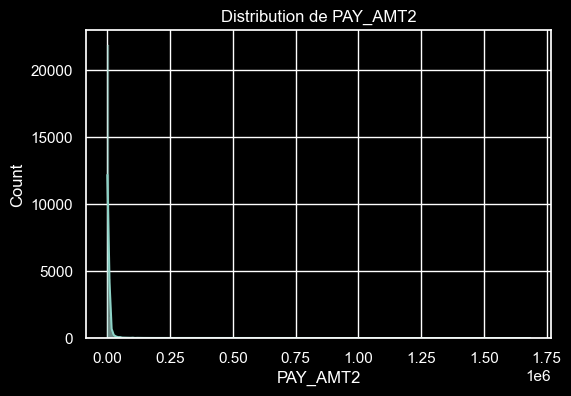

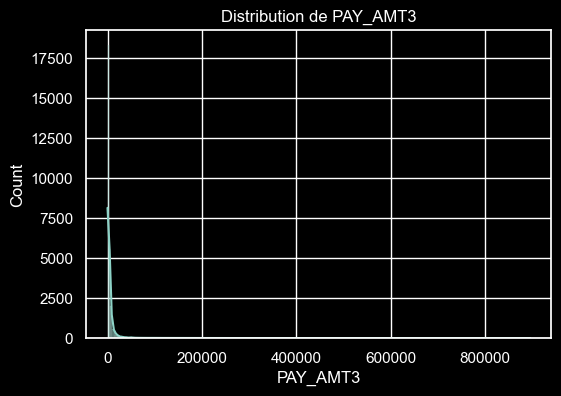

In [6]:
# Distribution de quelques variables numériques clés

num_cols = [
    "LIMIT_BAL", "AGE",
    "BILL_AMT1", "BILL_AMT2", "BILL_AMT3",
    "PAY_AMT1", "PAY_AMT2", "PAY_AMT3"
]

for col in num_cols:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.histplot(df[col], kde=True)
        plt.title(f"Distribution de {col}")
        plt.show()

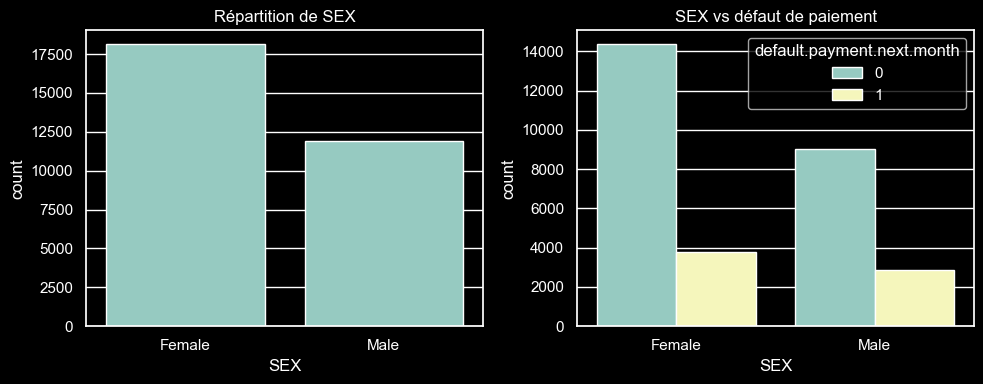

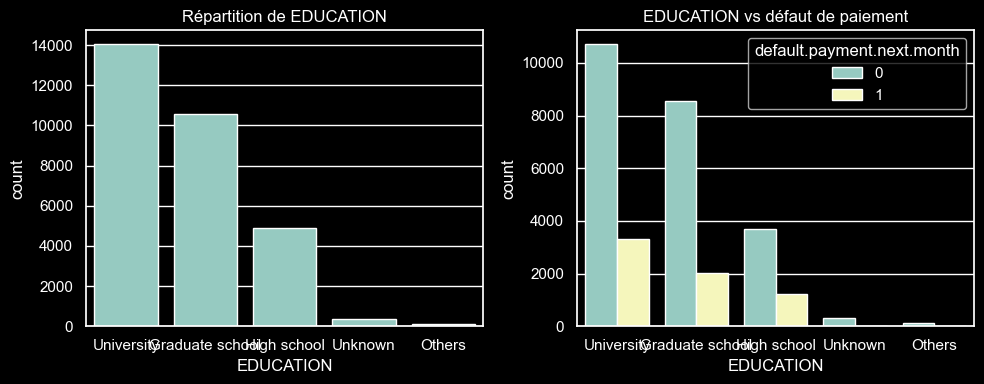

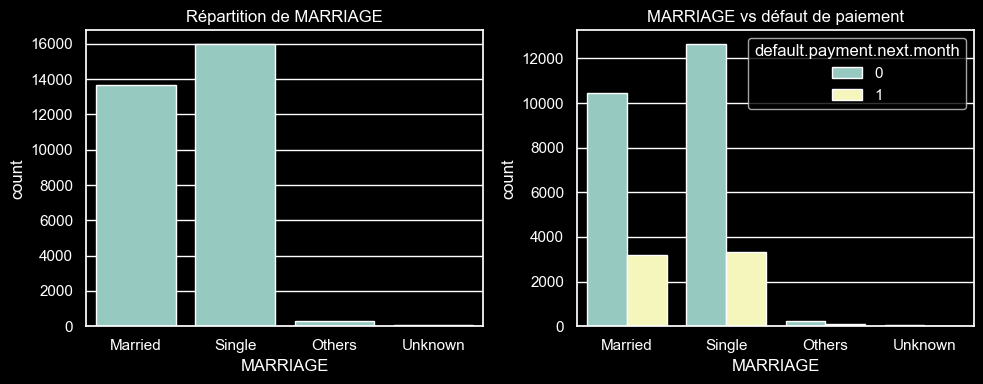

In [7]:
# Variables catégorielles : répartition et lien avec la cible

cat_cols = ["SEX", "EDUCATION", "MARRIAGE"]

for col in cat_cols:
    if col in df.columns:
        plt.figure(figsize=(10,4))
        plt.subplot(1,2,1)
        sns.countplot(x=col, data=df)
        plt.title(f"Répartition de {col}")

        plt.subplot(1,2,2)
        sns.countplot(x=col, hue=target_col, data=df)
        plt.title(f"{col} vs défaut de paiement")
        plt.tight_layout()
        plt.show()

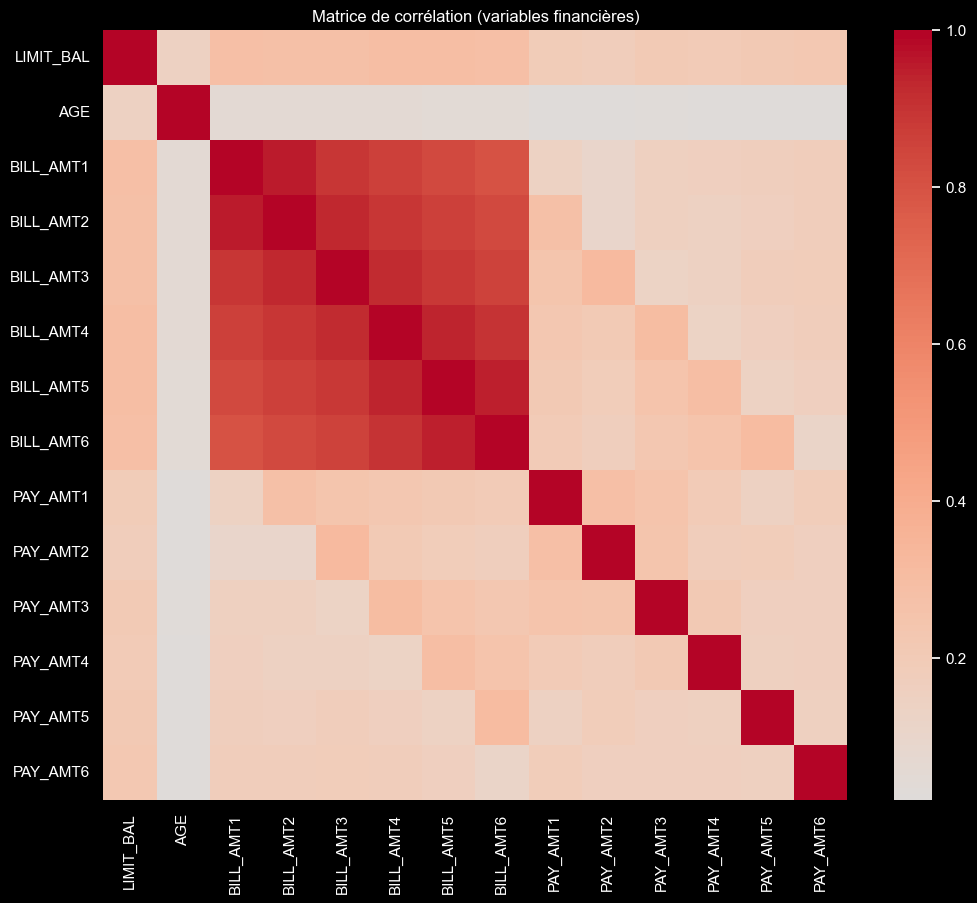

In [8]:
# Matrice de corrélation sur un sous-ensemble de variables numériques

corr_cols = [
    "LIMIT_BAL", "AGE",
    "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
    "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6",
]

cols = [c for c in corr_cols if c in df.columns]

plt.figure(figsize=(12,10))
sns.heatmap(df[cols].corr(), annot=False, cmap="coolwarm", center=0)
plt.title("Matrice de corrélation (variables financières)")
plt.show()

In [9]:
# Nettoyage et preprocessing de base

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Suppression éventuelle d'identifiants s'ils existent
cols_to_drop = []
for col in ["ID"]:
    if col in df.columns:
        cols_to_drop.append(col)

if cols_to_drop:
    df = df.drop(columns=cols_to_drop)

# Encodage simple des variables catégorielles déjà numériques / textuelles
# Ici, SEX, EDUCATION, MARRIAGE et les statuts de paiement (PAY_0, PAY_2, ...) peuvent être transformés

cat_cols_extended = []
for col in df.columns:
    if df[col].dtype == "object":
        cat_cols_extended.append(col)

print("Colonnes catégorielles détectées :", cat_cols_extended)

# Encodage par variables fictives (one-hot)
df_encoded = pd.get_dummies(df, columns=cat_cols_extended, drop_first=True)

# Séparation features / cible
X = df_encoded.drop(columns=[target_col])
y = df_encoded[target_col]

# Split train / test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Normalisation des variables numériques (optionnel mais utile pour certains modèles)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape

Colonnes catégorielles détectées : ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']


((24000, 80), (6000, 80))

C:\Users\ilias\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)


=== Classification report (Logistic Regression) ===
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.35      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000


Matrice de confusion :
[[4434  239]
 [ 861  466]]

AUC: 0.7569150554799324


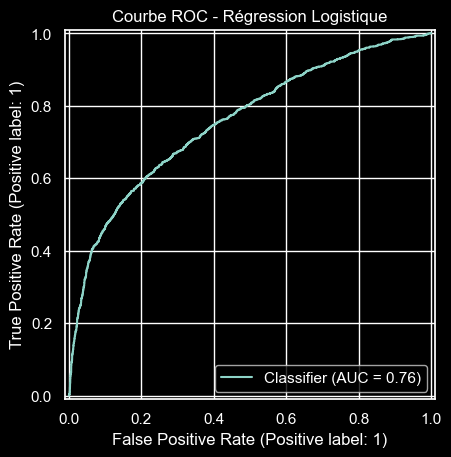

In [10]:
# Modèle supervisé : Régression Logistique

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

log_reg = LogisticRegression(max_iter=1000, n_jobs=-1)
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

print("=== Classification report (Logistic Regression) ===")
print(classification_report(y_test, y_pred))

print("\nMatrice de confusion :")
print(confusion_matrix(y_test, y_pred))

auc = roc_auc_score(y_test, y_prob)
print("\nAUC:", auc)

RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("Courbe ROC - Régression Logistique")
plt.show()

cluster
0    12677
1     5203
3     3355
2     2765
Name: count, dtype: int64


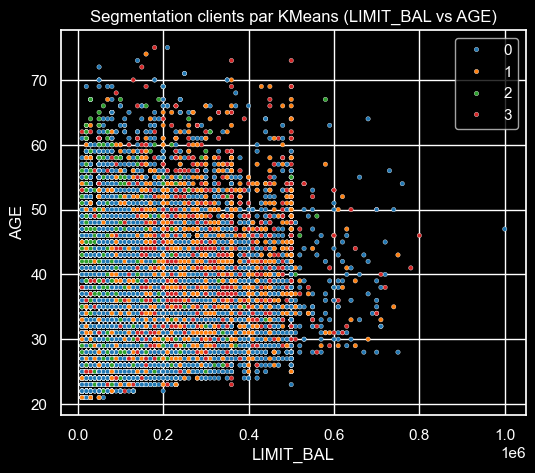


Taux de défaut par cluster :
cluster
0    0.168257
1    0.164328
2    0.613020
3    0.186587
Name: default, dtype: float64


In [11]:
# Modèle non supervisé : KMeans pour segmentation clients

from sklearn.cluster import KMeans

# On utilise ici les features normalisées
k = 4  # nombre de clusters à ajuster / justifier
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_train_scaled)

# Attribution des clusters aux données d'entraînement
X_train_km = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_km["cluster"] = clusters

print(X_train_km["cluster"].value_counts())

# Visualisation rapide sur deux dimensions (ex : LIMIT_BAL vs AGE si dispo)
if "LIMIT_BAL" in X_train.columns and "AGE" in X_train.columns:
    plt.figure(figsize=(6,5))
    sns.scatterplot(
        x=X_train["LIMIT_BAL"],
        y=X_train["AGE"],
        hue=clusters,
        palette="tab10",
        s=10
    )
    plt.title("Segmentation clients par KMeans (LIMIT_BAL vs AGE)")
    plt.show()

# Lien entre clusters et défaut (interprétation business)
cluster_df = pd.DataFrame({"cluster": clusters, "default": y_train.values})
print("\nTaux de défaut par cluster :")
print(cluster_df.groupby("cluster")["default"].mean())

## Interprétation rapide des modèles

- **Modèle supervisé (Logistic Regression)** :
  - Problème : classification binaire (défaut vs pas défaut).
  - Métriques : précision, rappel, f1-score et AUC permettent d'évaluer la capacité du modèle à détecter les clients en défaut.
  - Ici, le modèle atteint une AUC d'environ 0,76 : il discrimine correctement les bons et les mauvais payeurs, même s'il reste des erreurs.
  - Concrètement, la banque peut utiliser la probabilité de défaut comme score de risque pour adapter les décisions (augmentation / réduction de limite, conditions, refus, etc.).

- **Modèle non supervisé (KMeans)** :
  - Objectif : segmenter les clients en groupes homogènes de comportement.
  - Indicateur : taux de défaut moyen par cluster, pour identifier les segments les plus risqués.
  - Dans nos résultats, un cluster présente un taux de défaut supérieur à 60 % : il correspond à un profil de clients très risqués.
  - Ces segments peuvent être utilisés pour cibler des politiques spécifiques (surveillance renforcée, offres adaptées, ou restrictions de crédit).

In [12]:
# Sauvegarde du modèle, du scaler et de la liste de features

import joblib

joblib.dump(log_reg, "model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(list(X_train.columns), "features.pkl")

print("Objets sauvegardés : model.pkl, scaler.pkl, features.pkl")

Objets sauvegardés : model.pkl, scaler.pkl, features.pkl


## Analyse business, impact et limites

- **Impact potentiel** :
  - Le modèle supervisé permet d'estimer la probabilité de défaut de paiement et donc d'ajuster les décisions de crédit (acceptation, limite, conditions).
  - La segmentation non supervisée met en évidence des profils de clients plus ou moins risqués, utiles pour le marketing et la gestion du risque.

- **Limites** :
  - Données historiques : le modèle reflète les politiques passées de la banque.
  - Biais possibles : variables socio-démographiques sensibles (sexe, âge, etc.).
  - Simplifications techniques : preprocessing et choix de modèles de base.

- **Perspectives** :
  - Tester d'autres algorithmes (Random Forest, XGBoost, modèles de coût asymétrique).
  - Intégrer des coûts métier (perte en cas de défaut vs manque à gagner en cas de refus).
  - Mettre en place une surveillance du modèle une fois en production (drift des données).